# Predicting Hotel Reservation Cancellations

Morgan Nash

December 2026

# ADJUSTMENTS:
conclusions 
limitation
next steps
readme
finish presentation (maybe rewatch that first girls presentation)
run things and save them in colab and make the copy and push that
feature importance and tie that into the presentation
download the zip files for coursework
resume and linked in assignments are 


so far, these are the only issues between my env and colab env:
mine= sparse=False, colab= sparse_output=False
mine= get_feature_names(, colab= get_feature_names_out(
in colab don't run the cell importing data with data/......
all are because of scikit learn version..

# Project Objective: 
The goal of this project is to create a predictive classification model that identifies when a hotel reservation is high-risk before it's  cancelled, allowing your team to proactively intervene. We try several classification models and select a top performing model with high Precision to minimize the cost of offering unnecessary incentives to committed guests.

# Business Understanding:

Maintaining occupancy is a huge challenge for the modern hotel industry. Intense competition, outdated technology systems, as well as the ease of online booking (and cancelling), are just a few of the issues that hotels are required to battle. It goes without saying that every cancelled booking means revenue is lost. 

* Aggressive pricing from competitors, along with the rise of short-term rental platforms like AirBnb, make guest retention increasingly difficult.
  
* On top of that, many of the hotel reservation systems are outdated and lack the capabilities that are needed to predict customer behavior, limiting the reliability of reservation projections.
  
* Another reason for occupancy struggles is the ease of online booking and common "free cancellation" policies. This allows for customers to make multiple reservations simultaneously, which greatly increases the chance of last-minute cancellations.

With all of this, it's not shocking that your hotel is having issues with cancelled reservations, and we understand the immediate need for a predictive intervention system. 

We are hoping to help by creating a classification model that predicts when a hotel reservation is "high risk" so your team can intervene and reach out with incentives to secure the booking.

# Data Understanding:

This project uses the Hotel Reservations Dataset, accessed via [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data), and contains 36,275 records detailing customer reservations and characteristics from 2017 to 2018. This **Data Dictionary**, taken from the dataset's Kaggle page, describes each of the 19 columns: 

**Booking_ID:** unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

### Why is this Dataset a good choice?

This dataset is a good choice for this project for the following reasons:

1. It contains **real data**, rather than synthethic. This data represents genuine booking activity from a single hotel, although the hotel location is undisclosed. This means our model will allow us to derive practical insights from **real** customer behavior.

2. It has a **binary target:** booking_status ('Canceled' or 'Not_Canceled') which allows the model to be simpler and usually produce higher performance metrics as compared to a multiclass target.

3. It contains a mix of variables that can be tied to a customer's likelihood to cancel including:
    * **Customer Demographics:** number of adults and children, whether customer was a repeat guest or not
    * **Customer Behavior:** number of weekend and weeknights booked, type of meal plan, lead time (days between booking and arrival), special requests, past booking history, whether or not a parking space was required
    * **Financial & Operational Information:** Average room price, room type

### What Limitations exist for this Dataset?

The following list contains this dataset's primary limitations, and focuses on factors that could impact the model's generalizability:

**Limited Geographic Scope and Timeline:** The data is restricted to a 1 hotel only and is slightly outdated with the latest record from 2018 (before the Covid-19 Pandemic). The hotel location is also undisclosed. The dataset creator, [Ahsan Raza](https://www.kaggle.com/ahsan81/datasets), commented in the Discussion section: "This example data has been captured from single location/country which, due to discretionary reasons, cannot be disclosed." This adds a limit to the model's ability to generalize well to other locations after 2018.

**Missing External and Factors:** The dataset lacks external and economic influences. Information about competitor pricing, weather forecasts, or large events taking place nearby are just to name a few outside factors that frequently drive cancellation decisions, but they are invisible to the current model.

**Lack of Detailed Guest and Pricing Data:** Certain customer demographic details (like age and income), as well as records of the actual price paid by the customers (only the average is included) are absent. This limits the model's ability to truly understand a customer's price sensitivity.

**Feature Ambiguity:** Interpretation is hampered by the ciphered room type values and meal plan types, which cannot be leveraged fully without the encoding key, which is not included. This prevents us from deriving insights about specific room types.

# Model Evaluation Metrics:
During modeling, we set "Canceled" reservations to 1, and reservationes that were "Not Canceled" to 0. Below, we explain the difference in the costs between False Positives and False Negatives: 

* **False Positive:** Our model predicts that a reservation is "high risk" but the guests were planning on showing up.

    - Cost: You end up spending money, time, and effort on trying to save a booking that was never at risk of canceling.
    - High Precision minimizes these False Positives. Of all predicted positives (cancellations), how many were correct? It is important because money spent on a customer who was already committed is a direct, unnecessary cost.



* **False Negative:** Our model predicts the reservation was low-risk, but the guest actually canceled the booking.
  
    - Cost: You fail to intervene and lose the revenue associated with that booking.
    - High Recall minimizes False Negatives. Of all actual positives (cancellations), how many did we find? This is relevant for intervening to save bookings.


These costs are both very important to consider. Businesses often accept a slightly lower Recall if it means the model's Precision is very high, and they are highly confident in every intervention they make. To align with our goal of proactive cancellation prevention, we decide to prioritize a model with **High Precision** but still take other evaluation metrics into consideration.

# Data Preparation:

Run the following code cells to load the data using Kaggle in Google Colab:

In [1]:
# import json
# import pandas as pd
# import os
# from pathlib import Path
# import zipfile


# # your api key
# api_key = {
# 'username':"username" ,
# 'key':"some_api_key"}

# # uses pathlib Path
# kaggle_path = Path('/root/.kaggle')
# os.makedirs(kaggle_path, exist_ok=True)

# # opens file and dumps python dict to json object 
# with open (kaggle_path/'kaggle.json', 'w') as handl:
#     json.dump(api_key,handl)

# os.chmod(kaggle_path/'kaggle.json', 600)

In [2]:
# !kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

In [3]:
# zip_file_name = 'hotel-reservations-classification-dataset.zip'

# csv_file_name = 'Hotel Reservations.csv'

# with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
#     # Extract the specific CSV file to the current directory
#     zip_ref.extract(csv_file_name) 

# data = pd.read_csv(csv_file_name)
# print(data.head())

Alternatively, you can import the data by downloading a zipped version of the csv file from the [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data) page to your local environment: 
1. Clicking the Download Button on the top right of the dataset's Kaggle page
2. Clicking Download Dataset as Zip
3. Navigate to the zipped data in Downloads on local environment
4. Unzip the file
5. Move the file to our repository folder
6. Import the data using pandas 'read_csv'

### Import Libraries, Load and Preview Dataset:

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5) #set font size larger
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, make_scorer, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
#if kaggle api used above to load data, leave this commented: 
#load data and preview
data = pd.read_csv('data/hotel_reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
#check for shape, nulls, dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#check statistics of numerical columns
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
#see value counts of target column:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [9]:
#see distribution of the target, booking_status, as a percentage
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

#### Numerical Columns Initial Observations: 
* The required_car_parking_space and repeated_guest columns should be treated as categorical (0, or 1).
* There are outliers in the following columns:
    - lead_time
    - no_of_children (75th percentile is still 0.0, max is 10)
    - no_of_week_nights (75th percentile is 3, max is 17)
    - no_of_previous_cancellations (75th percentile is 0, max is 13)
    - no_of_previous_bookings_not_cancelled (75th percentile is 0, max is 58)
* I am curious if there are any records where no_of_weekend_nights and no_of_week_nights for a certain record are both 0.

# Data Cleaning & Feature Engineering:

In this section, we:
* check for duplicate rows
* drop Booking_ID column
* create a column 'is_cancelled' that maps the values in 'booking_status' to 1 or 0: 'Cancelled' to 1 and 'Not_Cancelled' to 0
* address some of the low-frequency categories found in certain categorical columns' value counts by consolidating
* make sure binary/discrete integer columns are changed to data type 'object' (required_car_parking_space, repeated_guest, and arrival_year(because there are only 2 years)) so they'll be treated as categorical
* plot the distribution of numeric columns
* manually add a maximum cap to certain numerical columns to handle their outliers
* check for (and drop) records where the total number of nights is zero

In [10]:
#check for duplicate entries
data['Booking_ID'].duplicated().sum()

0

In [11]:
#drop Booking_ID column as it will not help with predicting target
data = data.drop('Booking_ID', axis=1)

In [12]:
#create a new column where Canceled is encoded as 1 (positive class, representing high risk) and Not_Canceled is 0 from booking_status:
data['is_canceled'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

### Categorical Column Cleaning:

In [13]:
#create a list of columns to check their value_counts
cols_to_check= ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type',
                'repeated_guest']

#loop through columns and print value counts for each
for col in cols_to_check:
    print(f"\n- Value Counts for: {col} -")
    print(data[col].value_counts())


- Value Counts for: type_of_meal_plan -
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

- Value Counts for: required_car_parking_space -
0    35151
1     1124
Name: required_car_parking_space, dtype: int64

- Value Counts for: room_type_reserved -
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

- Value Counts for: arrival_year -
2018    29761
2017     6514
Name: arrival_year, dtype: int64

- Value Counts for: market_segment_type -
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

- Value Counts for: repeated_guest -
0    35345
1      930
Name: repeated_guest, dtype: int64


In [14]:
#for type_of_meal_plan, "Meal Plan 3" only accounts for 5 entries, I combine those 5 with "Not Selected"
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace('Meal Plan 3', 'Not Selected')

In [15]:
#check new value counts
data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5135
Meal Plan 2      3305
Name: type_of_meal_plan, dtype: int64

In [16]:
#for room_type_reserved, I combine "Room_Type 3" and "Room_Type 7" into "Other" as they are the least common room types
data['room_type_reserved'] = data['room_type_reserved'].replace(('Room_Type 3', 'Room_Type 7'), 'Rare')

In [17]:
#check new value counts
data['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Rare             165
Name: room_type_reserved, dtype: int64

In [18]:
#create list of integer columns to treat as categorical
cols_to_obj = ['arrival_year', 'required_car_parking_space', 'repeated_guest']
#loop through the columns and change the datatype to 'object'
for col in cols_to_obj:
    data[col] = data[col].astype('object')

### Numerical Column Cleaning:

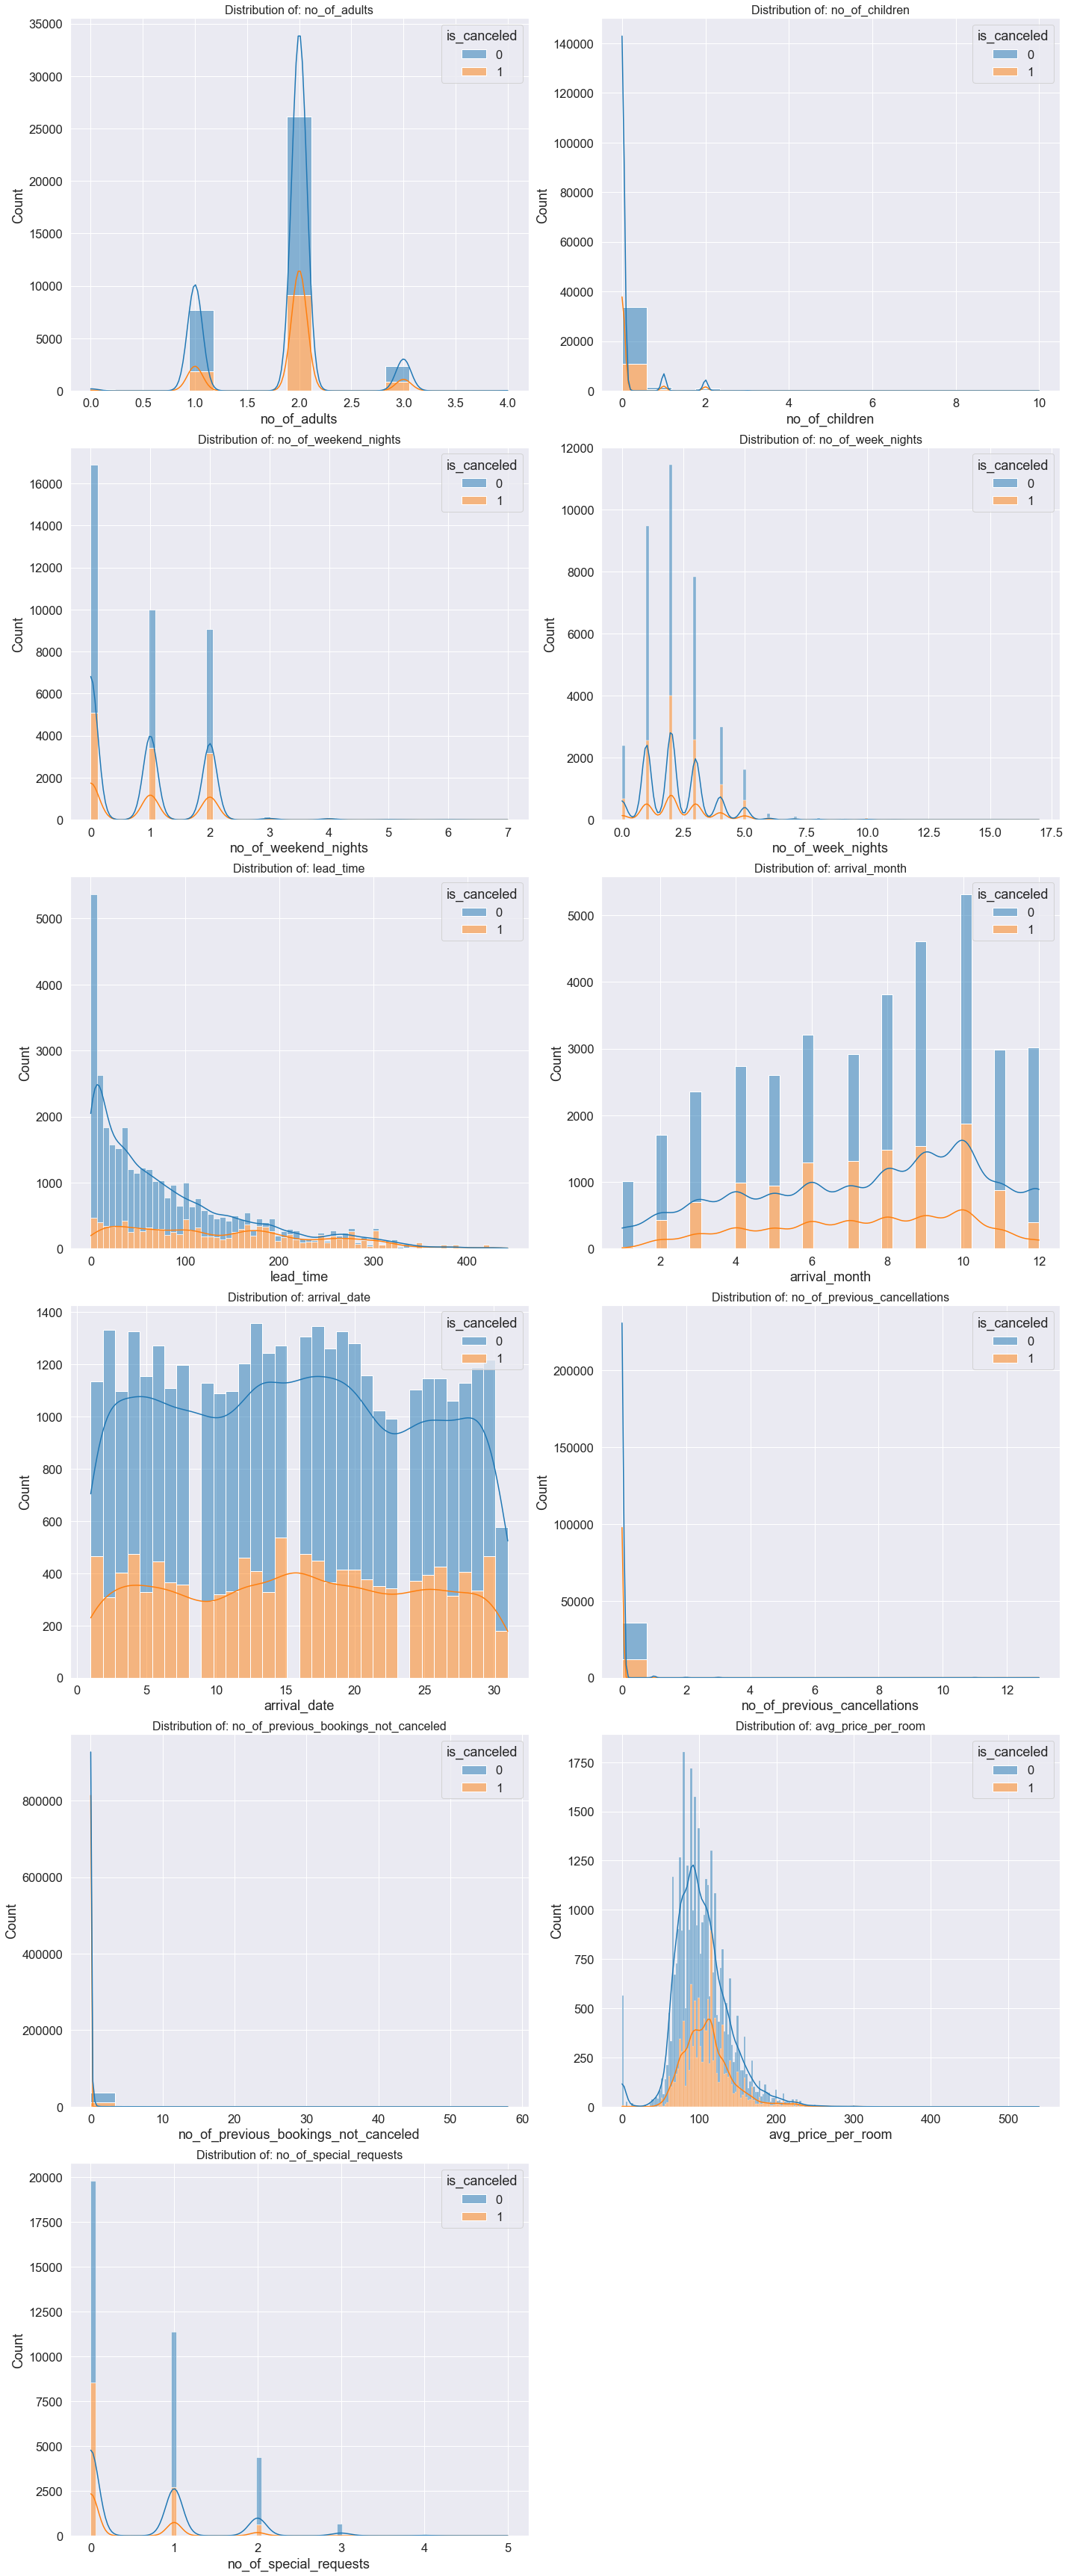

In [19]:
#Plot distribution of numeric columns:

#define numeric columns:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

#create list of columns to plot that includes numeric_cols but excludes 'is_canceled':
cols_to_plot = [col for col in numeric_cols if col not in ['is_canceled']]

#determine grid size
num_cols = 2
num_plots = len(cols_to_plot)
num_rows = (num_plots + num_cols - 1) // num_cols 

#figure with two-column layout:
plt.figure(figsize=(10 * num_cols, 8 * num_rows))
plt.subplots_adjust(hspace=0.7)

#create for loop that does the following per column in cols_to_plot:
for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    
    #plot histogram, setting hue to 'is_canceled':
    sns.histplot(data=data, x=col, hue='is_canceled', kde=True, ax=ax,
                 multiple='stack', palette='tab10')
    
    ax.set_title(f'Distribution of: {col}', fontsize=16)

plt.tight_layout()
plt.show();

### Handle Outliers in Numeric Columns by Manually Capping (Winsorizing):
The following code cells apply a logical maximum cap to the more extreme values found in certain numerical columns. This process replaces any value exceeding a manually defined "maximum cap" with the cap value itself which: 1. Reduces the influence of outliers and 2. Preserves the data by avoiding dropping any reservation records entirely.

In [20]:
#uncomment to view value counts
# data['no_of_previous_bookings_not_canceled'].value_counts()

In [21]:
#uncomment to view value counts
# data['no_of_children'].value_counts()

In [22]:
#uncomment to view value counts
# data['no_of_week_nights'].value_counts() #(75th percentile is 3, max is 17)

In [23]:
#uncomment to view value counts
# data['no_of_previous_cancellations'].value_counts() #(75th percentile is 0, max is 13)

In [24]:
#uncomment to view value counts
# data['no_of_special_requests'].value_counts()

In [25]:
#set the maximum 'no_of_previous_bookings_not_canceled' to 12 as anything more than 12 is extremely rare
data.loc[data['no_of_previous_bookings_not_canceled'] > 12, 'no_of_previous_bookings_not_canceled'] = 12

In [26]:
#set the maximum 'no_of_special_requests' to 2, as reservations with 3 or more are very rare 
data.loc[data['no_of_special_requests'] > 2, 'no_of_special_requests'] = 2

In [27]:
#set maximum 'no_of_children' to 3 as a clear business limit: it is highly unusual for a single booking to have more than 2 children.
data.loc[data['no_of_children'] > 2, 'no_of_children'] = 3 

In [28]:
#set maximum 'no_of_week_nights' to 6
data.loc[data['no_of_week_nights'] > 5, 'no_of_week_nights'] = 6

In [29]:
#set maximum 'no_of_previous_cancellations' to 4
data.loc[data['no_of_previous_cancellations'] > 3, 'no_of_previous_cancellations'] = 4

In [30]:
#sanity check:
print(data[['no_of_previous_bookings_not_canceled', 'no_of_children', 'no_of_week_nights',
            'no_of_special_requests', 'no_of_previous_cancellations']].max())

no_of_previous_bookings_not_canceled    12
no_of_children                           3
no_of_week_nights                        6
no_of_special_requests                   2
no_of_previous_cancellations             4
dtype: int64


In [31]:
#identify rows where the total number of nights is zero:
zero_nights_records = data[(data['no_of_weekend_nights'] == 0) & (data['no_of_week_nights'] == 0)]
print(len(zero_nights_records))

78


In [32]:
#create a cleaned copy of data that excludes the 78 false rows from above:
data_cleaned= data[(data['no_of_weekend_nights'] != 0) | (data['no_of_week_nights'] != 0)].copy()

print(f"Original: {len(data)}")
print(f"Cleaned: {len(data_cleaned)}")

Original: 36275
Cleaned: 36197


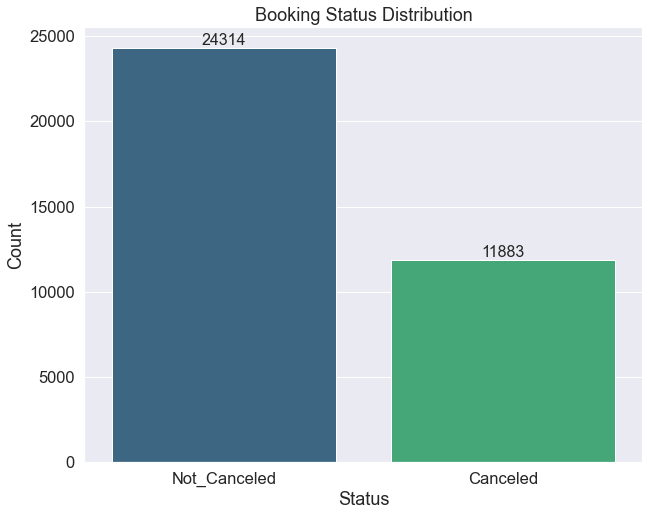

Not_Canceled    0.671713
Canceled        0.328287
Name: booking_status, dtype: float64


In [33]:
#seaborn barplot to show booking_status distribution (class imbalance!)
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='booking_status', data=data_cleaned, palette='viridis', order=data_cleaned['booking_status'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=16)
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
#plt.savefig('images/cancellation_distribution.jpg')
plt.show();

print(data_cleaned['booking_status'].value_counts(normalize=True))

## Additional Data Preprocessing: 
In this section, we:
* identify the features and target for the models
* train, test, split the data to prevent data leakage
* create a dummy model to produce baseline metrics so we ensure our models performance improves
* define OneHotEncoder to use for categorical columns
* define StandardScaler to use for numerical columns

### Identify Features and Target & Train, Test, Split Data:

In [34]:
#define full set of features and target
X = data_cleaned.drop(['is_canceled', 'booking_status'], axis=1)
y = data_cleaned['is_canceled']

#train, test, split (setting stratify=y to make sure the proportion of target values is the same in train and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (27147, 17)
X_test shape: (9050, 17)


In [35]:
#create dummy model to show baseline to improve upon using 'most_frequent':
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)

#fit model to training data
dummy_model.fit(X_train, y_train)

#predict test data
y_pred_dummy = dummy_model.predict(X_test)

# 3. Evaluate the Baseline
print("Dummy Classifier Baseline Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dummy))

print("\nDummy Classifier Classification Report:")
print(classification_report(y_test, y_pred_dummy, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Dummy Classifier Baseline Results
Confusion Matrix:
[[6079    0]
 [2971    0]]

Dummy Classifier Classification Report:
                  precision    recall  f1-score   support

Not_Canceled (0)       0.67      1.00      0.80      6079
    Canceled (1)       0.00      0.00      0.00      2971

        accuracy                           0.67      9050
       macro avg       0.34      0.50      0.40      9050
    weighted avg       0.45      0.67      0.54      9050



Using this dummy model, if we guessed the majority target class (Not Cancelled) for every reservation, we would have an accuracy of about 67% and Precision and Recall of 0%.

In [36]:
#define categorical features to be OneHotEncoded:
cat_features = [
    'type_of_meal_plan', 
    'room_type_reserved', 
    'market_segment_type', 
    'required_car_parking_space', 
    'repeated_guest',             
    'arrival_year']

In [37]:
#OneHotEncoder for categorical features:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

#define ColumnTransformer (this will be used for Random Forest and Gradient Boosting which are tree based, numerical scaling not neccessary):
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features)],
    remainder='passthrough')

In [38]:
#define numerical features to be scaled:
num_features = list(X_train.drop(columns=cat_features).columns)

#define StandardScaler
numerical_transformer = StandardScaler()


In [39]:
#define Logistic Regression preprocessor (using both OneHotEncoder and StandardScaler as Log. Reg is distance based):
lr_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        
        ('num', numerical_transformer, num_features)],
    remainder='passthrough')

# Modeling:

We decided to try the following models before selecting a top performer (High Precision) to fine tune its parameters:
* **Logistic Regression:** simple, interpretable model that establishes a performance baseline and helps to clearly identify which features have a direct, positive or negative influence on the risk of cancellation
* **Random Forest:** bagging ensemble model that combines the predictions from hundreds of independent decision trees and is better at finding hidden, non-linear patterns in the data that a simple model might miss 
* **Gradient Boosting:** boosting ensemble model  that builds trees one after the other, with each new tree focused on fixing the errors made by the previous ones. This was included to challenge the Random Forest model.

The following sections, split by model type, each create a pipeline that uses the preprocessors defined above along with the specific model. Each pipeline is fit on the training data and predicts test data. A Classification Report, Confusion Matrix, ROC AUC score, and ROC Curve Plot are displayed for each pipeline. Finally, we evaluate Feature Importance from each model to gain insight on what features lead a reservation to be high-risk. (A reminder that feature importance is a relative score, not a percentage.) After we evaluate these models, we tune the top performing model.

## Logistic Regression:

In [40]:
#Create Logistic Regression Pipeline:

#define model, using class_weight set to balanced as target class is unbalanced
logreg_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    random_state=42)

#create the pipeline using lr_preprocessor and logreg model:
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', lr_preprocessor),
    ('classifier', logreg_model)])


In [41]:
#fit the pipeline on training data:
pipeline_logreg.fit(X_train, y_train)

#predict on test data
y_pred_lr_pipe = pipeline_logreg.predict(X_test)

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr_pipe, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Logistic Regression Classification Report
                  precision    recall  f1-score   support

Not_Canceled (0)       0.87      0.79      0.83      6079
    Canceled (1)       0.64      0.76      0.69      2971

        accuracy                           0.78      9050
       macro avg       0.75      0.77      0.76      9050
    weighted avg       0.79      0.78      0.78      9050



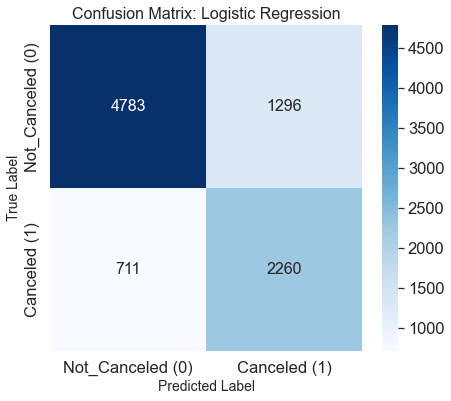

In [42]:
#Create and Plot Confusion Matrix:

#confusion matrix values
logreg_cm = confusion_matrix(y_test, y_pred_lr_pipe)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    logreg_cm, 
    annot=True,
    annot_kws={"fontsize": 16},
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show();

In [43]:
#get probabilities for ROC AUC
y_proba_lr_pipe = pipeline_logreg.predict_proba(X_test)[:, 1]
auc_score_lr = roc_auc_score(y_test, y_proba_lr_pipe)
auc_score_lr

0.8597680467582973

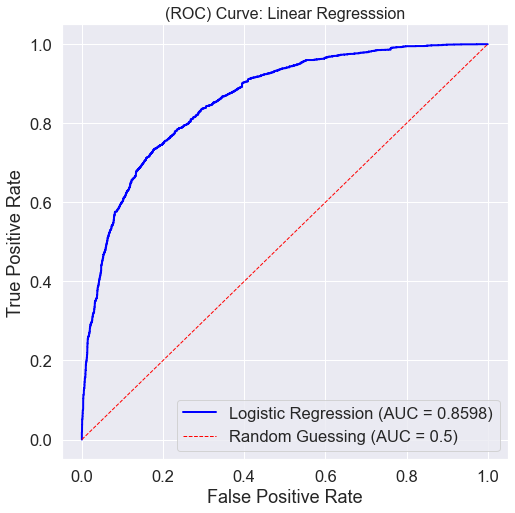

In [44]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr_pipe)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_score_lr:.4f})", color='blue', linewidth=2)

#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve: Linear Regresssion', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

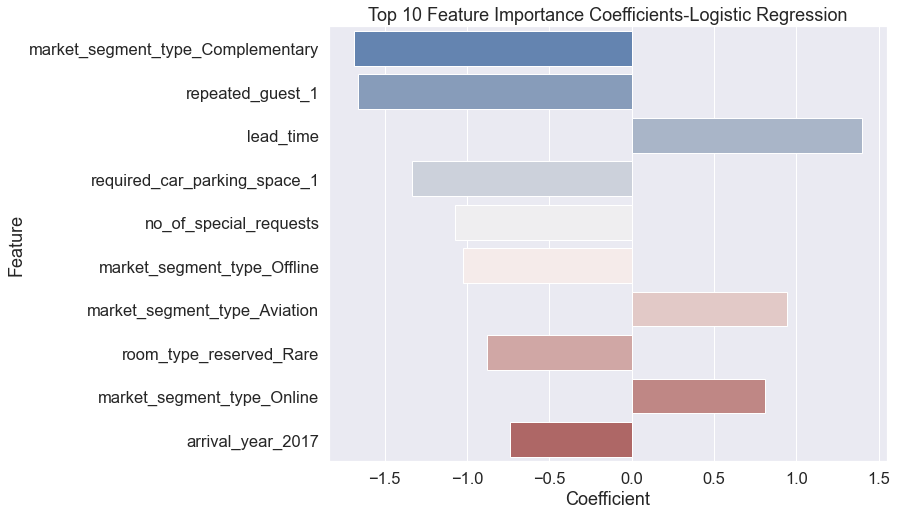


Top 10 Most Important Features (Magnitude and Direction):
                              Feature  Coefficient
10  market_segment_type_Complementary    -1.684342
17                   repeated_guest_1    -1.660987
24                          lead_time     1.396949
15       required_car_parking_space_1    -1.333751
30             no_of_special_requests    -1.070081
12        market_segment_type_Offline    -1.021651
9        market_segment_type_Aviation     0.945716
3             room_type_reserved_Rare    -0.877523
13         market_segment_type_Online     0.810256
18                  arrival_year_2017    -0.738990


In [45]:
#Top Feature Importance, Logistic Regression:

#save trained Logistic Regression model from the pipeline to lr_model_fitted
lr_model_fitted = pipeline_logreg['classifier']

#get the one hot encoded feature names from the ColumnTransformer:
ohe_feature_names = pipeline_logreg['preprocessor'].named_transformers_['cat'].get_feature_names(cat_features)
    
#get the numerical feature names from the ColumnTransformer:
numerical_features = list(X_train.drop(columns=cat_features).columns)

#combine the feature names
feature_names = np.concatenate([ohe_feature_names, numerical_features])

#create a DataFrame for the coefficients
coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model_fitted.coef_[0] #[0] as it's 2D array-binary
})

#sort by the absolute magnitude of the coefficient
coefficient_df['Magnitude'] = coefficient_df['Coefficient'].abs()
coefficient_df = coefficient_df.sort_values(by='Magnitude', ascending=False)

#plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coefficient_df.head(top_n), 
    palette='vlag')
plt.title(f'Top 10 Feature Importance Coefficients-Logistic Regression')
#plt.savefig('images/top_features_logreg.jpg')
plt.show();

print("\nTop 10 Most Important Features (Magnitude and Direction):")
print(coefficient_df[['Feature', 'Coefficient']].head(10))

## Random Forest Model:

In [46]:
#Create Random Forest Pipeline:

#define Random Forest model again setting class_weight to balanced:
rf_model = RandomForestClassifier(
    n_estimators=200,          
    class_weight='balanced',   
    random_state=42,
    n_jobs=-1)

#create the pipeline using preprocessor and Random Forest model:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', rf_model)])

In [47]:
#fit the pipeline on training data:
pipeline_rf.fit(X_train, y_train)

#predict on test data
y_pred_rf = pipeline_rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Random Forest Classification Report
                  precision    recall  f1-score   support

Not_Canceled (0)       0.91      0.94      0.92      6079
    Canceled (1)       0.86      0.81      0.84      2971

        accuracy                           0.90      9050
       macro avg       0.89      0.87      0.88      9050
    weighted avg       0.89      0.90      0.89      9050



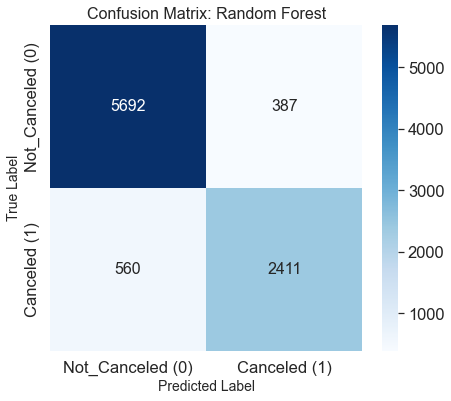

In [48]:
#Create and Plot Confusion Matrix:

#confusion matrix values
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_rf, 
    annot=True,     
    annot_kws={"fontsize": 16},
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Random Forest', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show();

In [49]:
#get probabilities for ROC AUC
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1] 
auc_score_rf = roc_auc_score(y_test, y_proba_rf)
auc_score_rf

0.9510402111013471

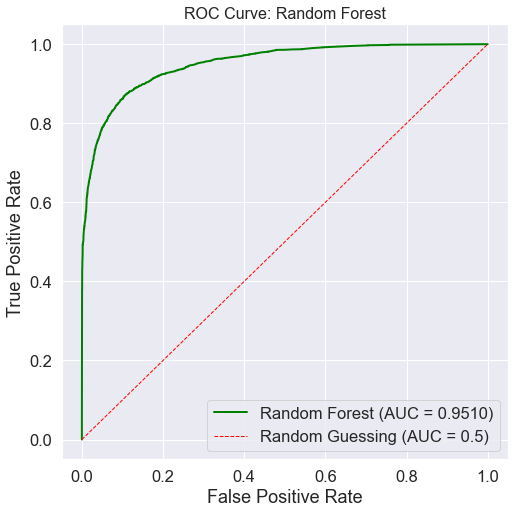

In [50]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.4f})", color='green', linewidth=2)
#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

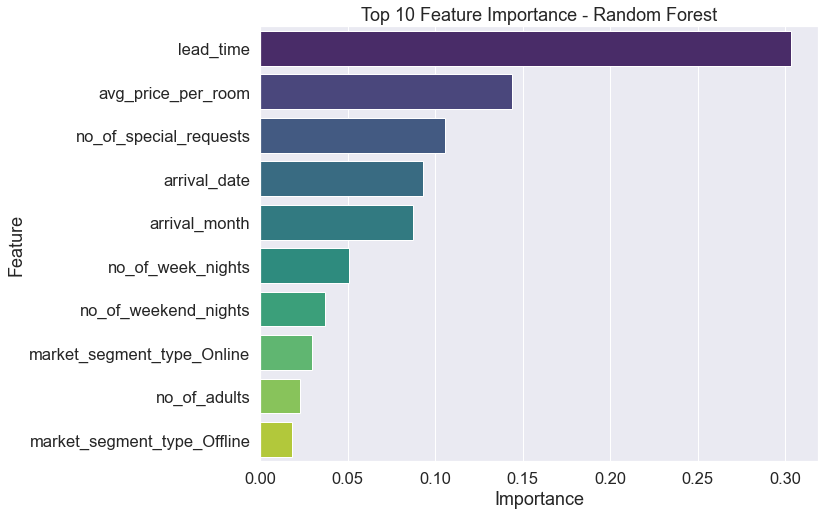


Top 10 Most Important Features:
                        Feature  Importance
24                    lead_time    0.303399
29           avg_price_per_room    0.143641
30       no_of_special_requests    0.105780
26                 arrival_date    0.093139
25                arrival_month    0.087255
23            no_of_week_nights    0.050588
22         no_of_weekend_nights    0.037217
13   market_segment_type_Online    0.029973
20                 no_of_adults    0.022939
12  market_segment_type_Offline    0.018417


In [51]:
#Top Feature Importance, Random Forest:

#save trained Random Forest model from the pipeline to rf_model_fitted
rf_model_fitted = pipeline_rf['classifier']

#save feature importance scores to importances
importances = rf_model_fitted.feature_importances_

#get the one hot encoded feature names from the ColumnTransformer:
ohe_feature_names = pipeline_rf['preprocessor'].named_transformers_['cat'].get_feature_names(cat_features)

#get the numerical feature names from the ColumnTransformer:
numerical_features = list(X_train.drop(columns=cat_features).columns)

#combine the feature names
feature_names = np.concatenate([ohe_feature_names, numerical_features])

#create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances})

#sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plot the top features
top_n = 10 
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(top_n), 
    palette='viridis'
)
plt.title(f'Top 10 Feature Importance - Random Forest')
#plt.savefig('images/top_features_rforest.jpg')

plt.show();

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

### Gradient Boosting Model:

In [52]:
#Create Gradient Boosting Pipeline
#define model, using a fraction of samples for each tree to try to reduce overfitting (subsample=0.8)
gb_model = GradientBoostingClassifier(
    n_estimators=100,      
    learning_rate=0.1,     
    subsample=0.8,         
    random_state=42)

#create the pipeline using preprocessor and gradient boosting model:
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', gb_model)])

In [53]:
#fit the pipeline on training data:
pipeline_gb.fit(X_train, y_train)

#predict on test data
y_pred_gb = pipeline_gb.predict(X_test)

print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Gradient Boosting Classification Report
                  precision    recall  f1-score   support

Not_Canceled (0)       0.86      0.92      0.89      6079
    Canceled (1)       0.81      0.70      0.75      2971

        accuracy                           0.85      9050
       macro avg       0.84      0.81      0.82      9050
    weighted avg       0.84      0.85      0.84      9050



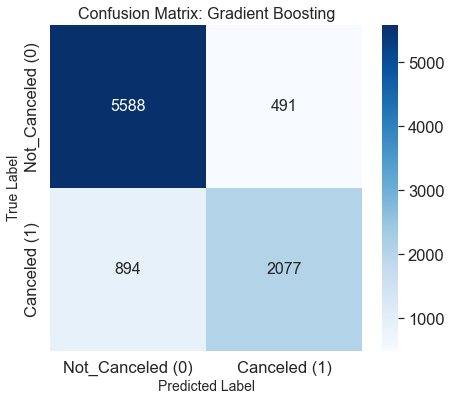

In [54]:
#Create and Plot Confusion Matrix:

#confusion matrix values
cm_gb = confusion_matrix(y_test, y_pred_gb)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_gb, 
    annot=True,
    annot_kws={"fontsize": 16},
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Gradient Boosting', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show();

In [55]:
#get probabilities for ROC AUC
y_proba_gb = pipeline_gb.predict_proba(X_test)[:, 1]
auc_score_gb = roc_auc_score(y_test, y_proba_gb)
auc_score_gb

0.9093013734953594

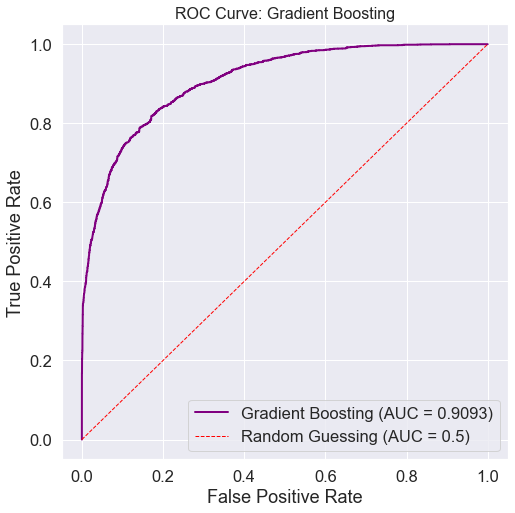

In [66]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_score_gb:.4f})", color='purple', linewidth=2)
#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Gradient Boosting', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

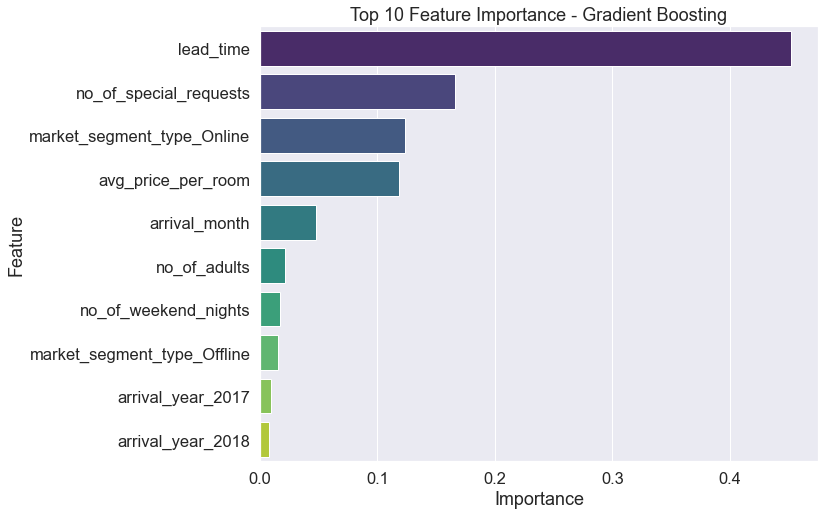


Top 10 Most Important Features-Gradient Boosting:
                        Feature  Importance
24                    lead_time    0.452526
30       no_of_special_requests    0.166279
13   market_segment_type_Online    0.123160
29           avg_price_per_room    0.118301
25                arrival_month    0.047624
20                 no_of_adults    0.021328
22         no_of_weekend_nights    0.016710
12  market_segment_type_Offline    0.015301
18            arrival_year_2017    0.009735
19            arrival_year_2018    0.007731


In [57]:
#Top Feature Importance, Gradient Boosting:

#save trained Random Forest model from the pipeline to rf_model_fitted
gb_model_fitted = pipeline_gb['classifier']

#save feature importance scores to importances
importances_gb = gb_model_fitted.feature_importances_

#get the one hot encoded feature names from the ColumnTransformer:
ohe_feature_names_gb = pipeline_gb['preprocessor'].named_transformers_['cat'].get_feature_names(cat_features)

#get the numerical feature names from the ColumnTransformer:
numerical_features_gb = list(X_train.drop(columns=cat_features).columns)

#combine the feature names
feature_names_gb = np.concatenate([ohe_feature_names_gb, numerical_features_gb])

#create a DataFrame
gb_feature_importance_df = pd.DataFrame({
    'Feature': feature_names_gb,
    'Importance': importances_gb})

#sort by importance in descending order
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

#plot the top features
top_n = 10 
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=gb_feature_importance_df.head(top_n), 
    palette='viridis'
)
plt.title(f'Top 10 Feature Importance - Gradient Boosting')
#plt.savefig('images/top_features_gboost.jpg')

plt.show();

print("\nTop 10 Most Important Features-Gradient Boosting:")
print(gb_feature_importance_df.head(10))

# Model Evaluation:

### Compare Logistic Regression, Random Forest, & Gradient Boosting Model Results:

**Logistic Regression:**
* Accuracy 78%
* Precision (Canceled=1) 64%
* Recall (Canceled=1) 76%
* AUC Score 0.860
  
**Random Forest:**
* Accuracy 90%
* Precision (Canceled=1) 86%
* Recall (Canceled=1) 81%
* AUC Score 0.951
  
**Gradient Boosting:**
* Accuracy 85%
* Precision (Canceled=1) 81%
* Recall (Canceled=1) 70%
* AUC Score 0.909

## Top Model: Random Forest

The Random Forest model delivers superior performance across all key metrics: highest Accuracy, highest Precision, highest Recall, and the highest AUC Score. It effectively maximizes the chance of successfully identifying true high-risk cases while minimizing the financial risk associated with offering incentives to low-risk guests.

1. The Random Forest model achieved the highest overall Accuracy (90%), demonstrating it has the strongest ability to correctly classify both Canceled and Not Canceled reservations.

2. The Random Forest model has the highest Precision (86%). When the Random Forest predicts a booking will cancel, it is correct 86% of the time. This translates to the lowest rate of wasted intervention costs among all models.

3. The Random Forest model also acheived the best Recall (81%). It successfully identifies 81% of all actual cancellations, striking the best balance between catching high-risk guests and minimizing waste.

4. The Random Forest's AUC score also acheived the highest (0.951). This means there is a 95.1% chance that the model will correctly distinguish between a randomly selected Canceled reservation and a randomly selected Not Canceled reservation. This indicates a high-quality ranking system for risk.

## Feature Importance Analysis:

Our analysis of Feature Importance across all three models points to three main categories of predictors that drive cancellation risk: Time Related Risk Factors, Loyalty/Commitment Signals, and Market/Pricing Factors:

1. **Time-Based Risk** (The Dominant Predictor):
       The **lead_time** between booking and arrival is the single most influential factor across all models, confirming that the longer the lead time, the less committed the guest is. (Using Logistic Regression, the sign of the coefficient tells us the direction of the relationship with the positive class (which is Canceled in this context). Lead_time coefficient is a Positive predictor, meaning that as the value of lead_time increases, the log-odds of the positive class (Canceled = 1) also increase.)

2. **Commitment Signals** (Strong predictors against cancellation): These features are strong negative predictors of cancellation. The Logistic Regression model, in particular, assigned them high negative magnitudes, and therefore we consider them as "anti-cancellation switches."
    - **no_of_special_requests** A high number of requests implies the guest is heavily invested in their stay details.
    - **repeated_guest_1** Being a repeat customer is the strongest loyalty indicator.
    - **required_car_parking_space_1** Requesting a parking space suggests a planned arrival with strong commitment. 
      
3. **Market and Pricing Factors**: The tree-based models (Random Forest and GradientBoosting) uncover the influence of pricing and market channel (how the reservation was booked), which the linear Logistic Regression model missed:
   - **avg_price_per_room** This is the second most important feature in the Random Forest model, but it didn't even make the top 10 for our Logistic Regression model. This suggests its relationship with cancellation is non-linear (and risk might be higher at both very low and very high price points, but low in the middle).
    - **market_segment_type_Online** Online bookings increase the risk of cancellation (often due to flexible cancellation policies).
    - **market_segment_type_Offline** Offline bookings decrease the risk of cancellation (often implies more commitment or corporate travel).


4. **Other Time-Related Features:** The Random Forest analysis specifically highlighted the importance of **arrival_date** and **arrival_month** which indicates that there are specific periods within the year when cancellation risk spikes, a pattern that the simple, linear Logistic Regression model may not be able to capture effectively.

This analysis, along with comparing the previous model results, confirms that a more sophisticated, non-linear model (Random Forest/Gradient Boosting) is necessary to capture the more complex relationships between time (lead time), pricing, and seasonality. The next section focuses on further tuning the best performing Random Forest model.

## Feature Importance Visualizations:
Below we plot Room Cancellation Rate by Lead Time as well as Room Cancellation Rate by Average Room Price:

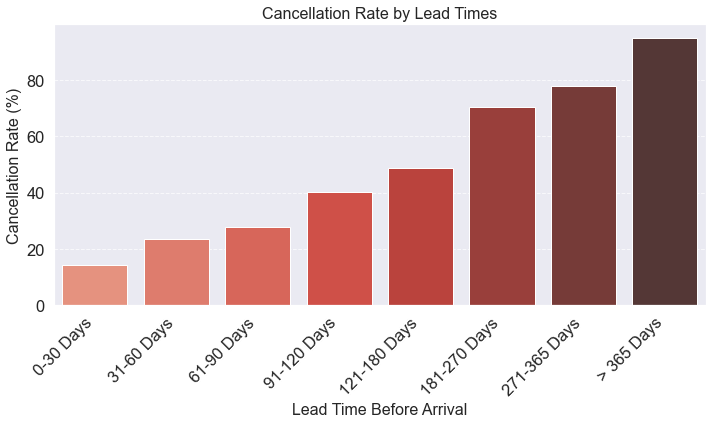

Cancellation Rates(%):
Lead Time 0-30 Days: 14
Lead Time 31-60 Days: 24
Lead Time 61-90 Days: 28
Lead Time 91-120 Days: 40
Lead Time 121-180 Days: 49
Lead Time 181-270 Days: 70
Lead Time 271-365 Days: 78
Lead Time > 365 Days: 95


In [58]:
#Plot Cancellation Rate by Lead Times

#define bins for lead times:
bins = [0, 30, 60, 90, 120, 180, 270, 365, np.inf]
labels = ['0-30 Days', '31-60 Days', '61-90 Days', '91-120 Days', '121-180 Days', '181-270 Days', '271-365 Days', '> 365 Days']

#create a new binned lead_time column
data_cleaned['lead_time_group'] = pd.cut(data_cleaned['lead_time'], bins=bins, labels=labels, right=True, include_lowest=True)

#groupby lead_time_group and calculate the cancellation rate
#when calculating the mean of a binary column, the result is the proportion of 1's in that group (how many cancelled out of how many total)
lead_time_cancellation = data_cleaned.groupby('lead_time_group', observed=False)['is_canceled'].mean().reset_index()
lead_time_cancellation['cancellation_rate'] = lead_time_cancellation['is_canceled'] * 100

#plot the cancellation rate by lead_time_group
plt.figure(figsize=(10, 6))
sns.barplot(
    x='lead_time_group', 
    y='cancellation_rate', 
    data=lead_time_cancellation, 
    palette='Reds_d'
)

plt.title('Cancellation Rate by Lead Times', fontsize=16)
plt.xlabel('Lead Time Before Arrival', fontsize=16)
plt.ylabel('Cancellation Rate (%)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('images/cancel_rate_lead_time.jpg')
plt.show();

print("Cancellation Rates(%):")
for index, row in lead_time_cancellation.iterrows():
    group = row['lead_time_group']
    rate = row['cancellation_rate']
    print(f"Lead Time {group}: {rate:.0f}")

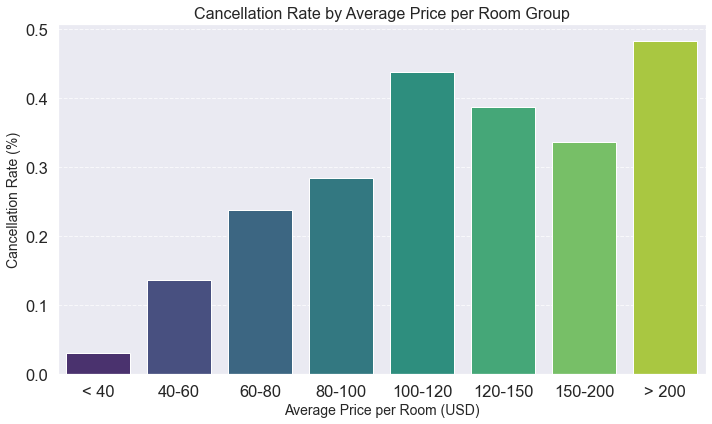

Cancellation Rate by Average Price per Room Group:
Group $< 40: 3.1%
Group $40-60: 13.6%
Group $60-80: 23.8%
Group $80-100: 28.4%
Group $100-120: 43.8%
Group $120-150: 38.7%
Group $150-200: 33.6%
Group $> 200: 48.3%


In [79]:
#Plot Cancellation Rate by Average Room Price

#define bins for avg_price_per_room:
bins = [0, 40, 60, 80, 100, 120, 150, 200, data_cleaned['avg_price_per_room'].max() + 1]
labels = ['< 40', '40-60', '60-80', '80-100', '100-120', '120-150', '150-200', '> 200']

#create a new binned avg_price_per_room column
data_cleaned['room_price_group'] = pd.cut(
    data_cleaned['avg_price_per_room'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True)

#groupby new room_price_group column and calculate the cancellation rate
#when calculating the mean of a binary column, the result is the proportion of 1's in that group (how many cancelled out of how many total)
price_cancellation = data_cleaned.groupby('room_price_group', observed=False)['is_canceled'].mean().reset_index()
price_cancellation.rename(columns={'is_canceled': 'cancellation_rate'}, inplace=True)

#plot the cancellation rate by room_price_group
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='room_price_group',
    y='cancellation_rate',
    data=price_cancellation,
    palette='viridis')

plt.title('Cancellation Rate by Average Price per Room Group', fontsize=16)
plt.xlabel('Average Price per Room (USD)', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('images/
plt.tight_layout()
plt.show();

print("Cancellation Rate by Average Price per Room Group:")
for index, row in price_cancellation.iterrows():
    group = row['room_price_group']
    rate = row['cancellation_rate']
    print(f"Group ${group}: {rate:.1%}")

## Random Forest Model Tuning:

To tune our Random Forest model, we define a parameter grid and use Grid Search Cross-Validation to find the best parameters. The parameters we chose to tune are as following:

**n_estimators:** The number of trees in the forest. More trees generally mean better performance, but increases computation time.
[50, 100, 200]

**max_depth:** The maximum depth of each tree. Limiting this helps to prevent the model from overfitting.
[5, 10, 20, 30]

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. 1 is the default value and is common for classification models, allows for detailed trees.
[1, 2, 4]

In [59]:
#define the parameter grid, with 'classifier' step name + parameter name:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]}

#define precision as the scoring metric for positive class (Canceled=1)
precision_scorer = make_scorer(precision_score, pos_label=1)

#initialize GridSearchCV using pipeline_rf (fitted Random Forest pipeline), cv=5 folds
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    scoring=precision_scorer,
    cv=5,                 
    verbose=2,
    n_jobs=-1)

#fit the grid_search_rf to the training data
grid_search_rf.fit(X_train, y_train)

#get best parameters and score:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [60]:
best_params_rf

{'classifier__max_depth': 30,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 200}

In [61]:
best_score_rf

0.8698128853573923

In [67]:
#update the parameters in Random Forest pipeline
tuned_rf_pipe= pipeline_rf.set_params(
    classifier__max_depth=30,
    classifier__min_samples_leaf=1,
    classifier__n_estimators=200)

#retrain on the training data
tuned_rf_pipe.fit(X_train, y_train)

#make predictions on untouched test data
y_pred_rf_tuned = tuned_rf_pipe.predict(X_test)

print("Optimized Random Forest Results (Test Set)")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Not_Canceled (0)', 'Canceled (1)']))
print(f"Tuned Random Forest AUC Score: {roc_auc_score(y_test, y_proba_rf_tuned):.4f}")

Optimized Random Forest Results (Test Set)
                  precision    recall  f1-score   support

Not_Canceled (0)       0.91      0.94      0.92      6079
    Canceled (1)       0.86      0.82      0.84      2971

        accuracy                           0.90      9050
       macro avg       0.89      0.88      0.88      9050
    weighted avg       0.90      0.90      0.90      9050

Tuned Random Forest AUC Score: 0.9511


In [68]:
#get probabilities for ROC AUC
y_proba_rf_tuned = tuned_rf_pipe.predict_proba(X_test)[:, 1] # Probability for the positive class (1)
auc_score_tuned_rf = roc_auc_score(y_test, y_proba_rf_tuned)
auc_score_tuned_rf

0.9510797167486613

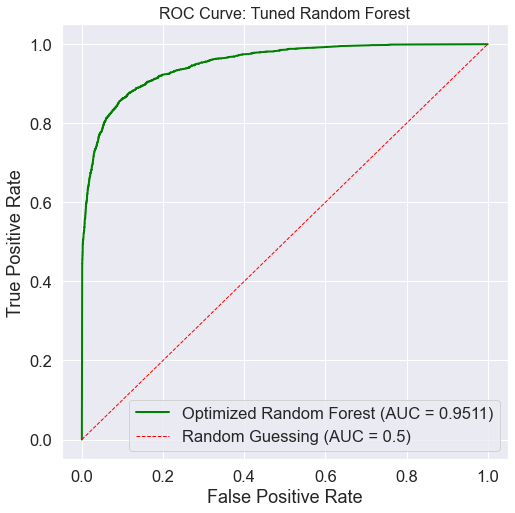

In [70]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_tuned_rf, tpr_tuned_rf, thresholds_tuned_rf = roc_curve(y_test, y_proba_rf_tuned)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_tuned_rf, tpr_tuned_rf, label=f"Optimized Random Forest (AUC = {auc_score_tuned_rf:.4f})", color='green', linewidth=2)
#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

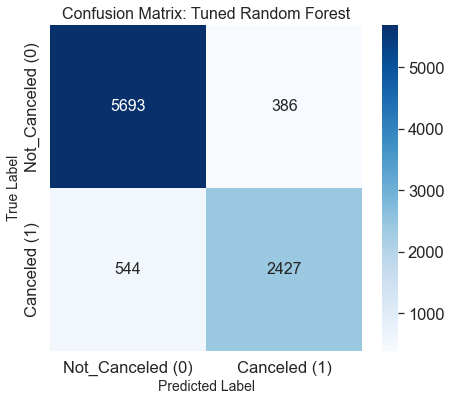

In [64]:
#Create and Plot Confusion Matrix:

#confusion matrix values
cm_tuned_rf = confusion_matrix(y_test, y_pred_rf_tuned)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_tuned_rf, 
    annot=True,
    annot_kws={"fontsize": 16},
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Tuned Random Forest', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.savefig('images/cm_final_model.jpg')
plt.show();

### Final Model Metrics:
- **High Accuracy:**	90% The final model correctly predicted a reservation's booking status (either Canceled or Not Canceled) 90% of the time.
- **Great AUC Score:** 0.9511 This AUC Score shows our model's excellent ability to distinguish between high-risk and low-risk bookings.
- **High Precision Confirmed**: The 86% Precision for the Canceled (1) class ensures that the cost of intervention is minimized. Only 14% of interventions are "wasted" on guests who wouldn't have canceled anyway. When this model predicts a cancellation, it is correct 86 out of 100 times.
- **Excellent Recall**: The 82% Recall means our final model is also highly effective at capturing the cancellations you are trying to prevent. This model correctly identifies 82% of all actual cancellations.




# Conclusion:

We achieved our initial goal of building an optimized predictive model that classifies reservations as high-risk (or not) prior to arrival or cancellation. That final model was our Optimized Random Forest Classifier. 
Our final model acheived the following performance metrics (on the Test Set):
- Precision (Canceled=1): 86%
- Recall (Canceled=1): 82%
- AUC Score: 0.9511

### Business Insight Summary:

Main Risk Drivers:

1. Time: A long lead time is the single most dominant feautre predicting a hight risk reservation (confirmed by all models).

2. Market: The market_segment_type_Online is a major predictor of risk most likely due to flexible cancellation policies.

3. Price: avg_price_per_room has a complex, non-linear relationship with risk.

The Anti-Cancellation Signals: These features highlight the strongest commitment signals that point to a low-risk reservation:

Repeat guests, a higher number of special requests, and guests that required a car parking space are all strong indicators of committed guests.

# Next Steps:

## Proposed Deployment Strategy:

## Intervention Strategy (Putting Precision to Work):